In [1]:
%load_ext watermark
%watermark -a 'Christian Schuhegger' -u -d -v -p numpy,pandas,matplotlib,astroML,astropy

Christian Schuhegger 
last updated: 2019-02-01 

CPython 3.6.6
IPython 7.2.0

numpy 1.15.4
pandas 0.23.4
matplotlib 3.0.1
astroML 0.4-git
astropy 3.0.5


* http://www.astroml.org/examples/algorithms/plot_bayesian_blocks.html
* http://docs.astropy.org/en/stable/api/astropy.stats.scott_bin_width.html
* http://docs.astropy.org/en/stable/api/astropy.stats.freedman_bin_width.html
* http://docs.astropy.org/en/stable/api/astropy.stats.knuth_bin_width.html
* http://docs.astropy.org/en/stable/api/astropy.stats.bayesian_blocks.html
* http://docs.astropy.org/en/stable/api/astropy.stats.histogram.html

In [2]:
%matplotlib inline
import numpy as np, scipy, scipy.stats as stats, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import astroML.plotting, astroML.density_estimation, astropy.stats

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(edgeitems=10)
np.set_printoptions(suppress=True)
np.core.arrayprint._line_width = 180

sns.set()

In [3]:
%load_ext autoreload
%autoreload 1
%aimport dsbasics.bin

In [4]:
t_min = -15
t_max =  15
t_range = np.linspace(t_min, t_max, 1000)
y = \
   500 * stats.cauchy(-5, 1.8).pdf(t_range) + \
  2000 * stats.cauchy(-4, 0.8).pdf(t_range) + \
   500 * stats.cauchy(-1, 0.3).pdf(t_range) + \
  1000 * stats.cauchy(2, 0.8).pdf(t_range) + \
   500 * stats.cauchy(4, 1.5).pdf(t_range)
y = y / 4500

Text(0, 0.5, 'P(t)')

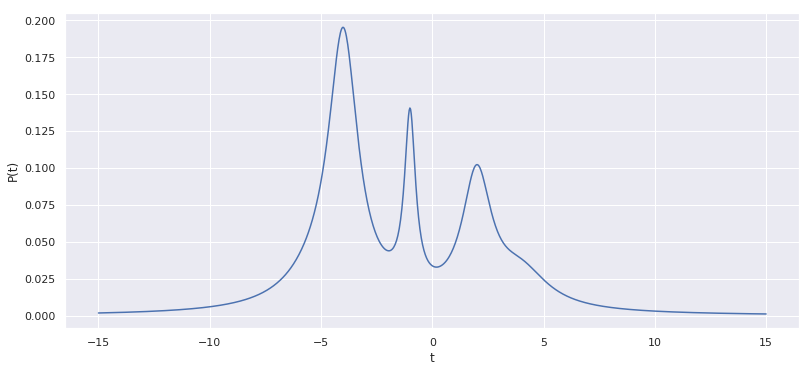

In [5]:
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

ax = fig.add_subplot(111)
ax.plot(t_range, y)
ax.set_xlabel('t')
ax.set_ylabel('P(t)')

In [6]:
# draw a set of variables
np.random.seed(0)
t = np.concatenate([stats.cauchy(-5, 1.8).rvs(500),
                    stats.cauchy(-4, 0.8).rvs(2000),
                    stats.cauchy(-1, 0.3).rvs(500),
                    stats.cauchy(2, 0.8).rvs(1000),
                    stats.cauchy(4, 1.5).rvs(500)])

# truncate values to a reasonable range
t = t[(t > t_min) & (t < t_max)]

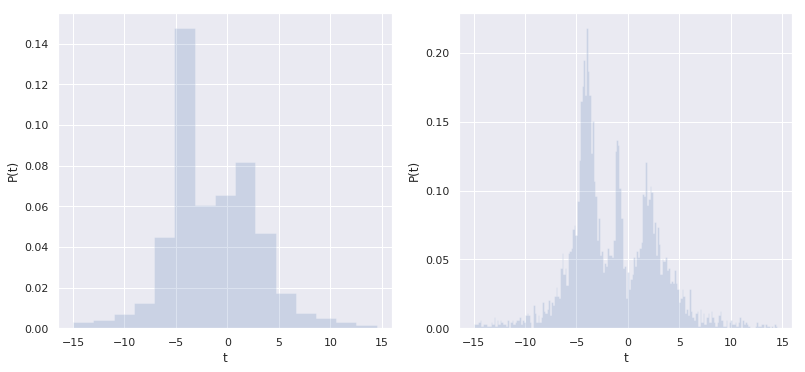

In [7]:
# First figure: show normal histogram binning via matplotlib
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

ax1 = fig.add_subplot(121)
ax1.hist(t, bins=15, histtype='stepfilled', alpha=0.2, density=True)
ax1.set_xlabel('t')
ax1.set_ylabel('P(t)')

ax2 = fig.add_subplot(122)
ax2.hist(t, bins=200, histtype='stepfilled', alpha=0.2, density=True)
ax2.set_xlabel('t')
ax2.set_ylabel('P(t)');

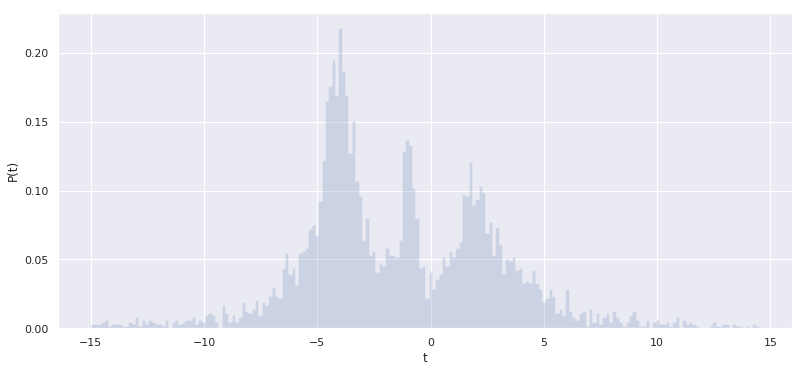

In [8]:
# same as above but using the underlying numpy histogram function to create the bin edges
hist, bin_edges = np.histogram(t, bins=200, density=True)
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)
ax = plt.subplot(111)
ax.hist(t, bins=bin_edges, histtype='stepfilled', alpha=0.2, density=True)
ax.set_xlabel('t')
ax.set_ylabel('P(t)');

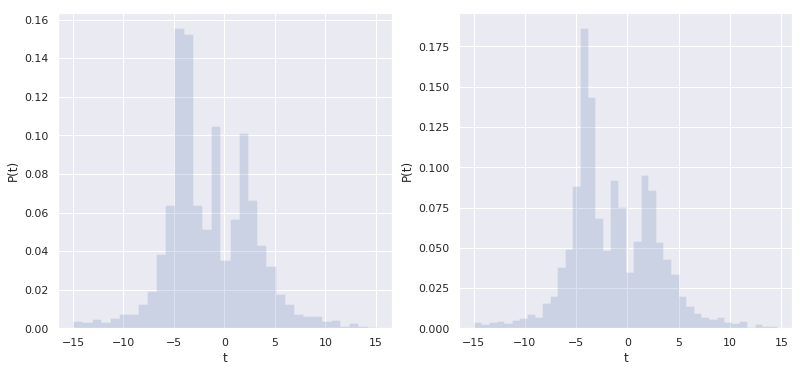

In [9]:
# using scott's rule and freedman's rule
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

optimal_bin_width, bin_edges = astropy.stats.scott_bin_width(t, return_bins=True)
ax1 = fig.add_subplot(121)
ax1.hist(t, bins=bin_edges, histtype='stepfilled', alpha=0.2, density=True)
ax1.set_xlabel('t')
ax1.set_ylabel('P(t)')

optimal_bin_width, bin_edges = astropy.stats.freedman_bin_width(t, return_bins=True)
ax2 = fig.add_subplot(122)
ax2.hist(t, bins=bin_edges, histtype='stepfilled', alpha=0.2, density=True)
ax2.set_xlabel('t')
ax2.set_ylabel('P(t)');

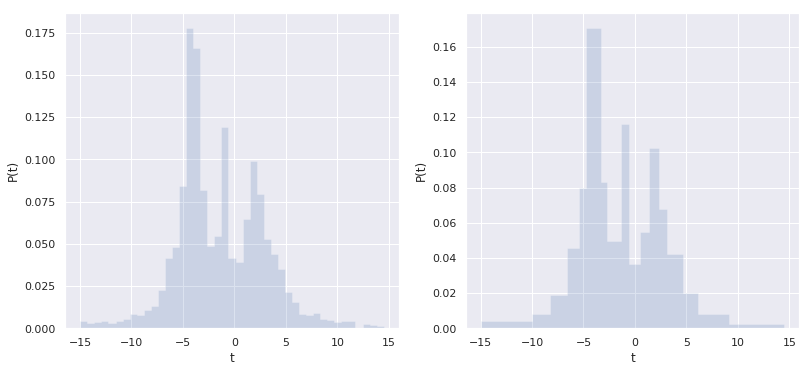

In [10]:
# using knuth's rule and bayesian blocks from astropy
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

optimal_bin_width, bin_edges = astropy.stats.knuth_bin_width(t, return_bins=True)
ax1 = fig.add_subplot(121)
ax1.hist(t, bins=bin_edges, histtype='stepfilled', alpha=0.2, density=True)
ax1.set_xlabel('t')
ax1.set_ylabel('P(t)')

bin_edges = astropy.stats.bayesian_blocks(t, fitness='events') # , p0=0.01
ax2 = fig.add_subplot(122)
ax2.hist(t, bins=bin_edges, histtype='stepfilled', alpha=0.2, density=True)
ax2.set_xlabel('t')
ax2.set_ylabel('P(t)');

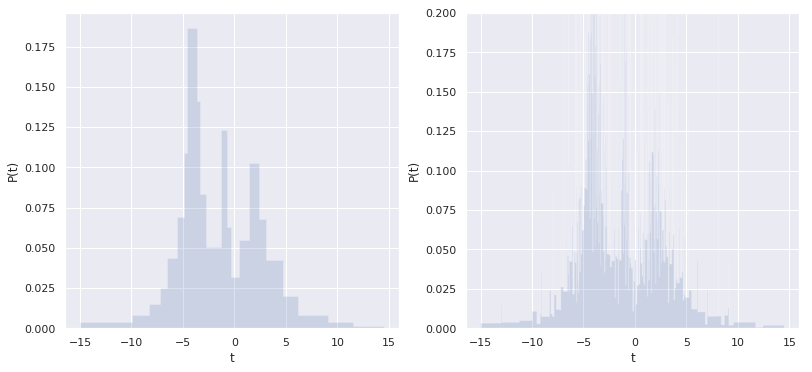

In [11]:
# using bayesian blocks from dsbasics with different parameters of neg_ln_gamma (the probability for creating bins)
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

# bbt = dsbasics.bin.BayesianBlocksBinTransformerp0=None, neg_ln_gamma=320)
bbt1 = dsbasics.bin.BayesianBlocksBinTransformer(neg_ln_gamma=4)
bin_edges = bbt1.fit(t.reshape(-1,1)).bins_[0]
ax1 = fig.add_subplot(121)
ax1.hist(t, bins=bin_edges, histtype='stepfilled', alpha=0.2, density=True)
ax1.set_xlabel('t')
ax1.set_ylabel('P(t)')

bbt2 = dsbasics.bin.BayesianBlocksBinTransformer(neg_ln_gamma=1)
bin_edges = bbt2.fit(t.reshape(-1,1)).bins_[0]
ax2 = fig.add_subplot(122)
ax2.hist(t, bins=bin_edges, histtype='stepfilled', alpha=0.2, density=True)
ax2.set_ylim([0.0,0.2])
ax2.set_xlabel('t')
ax2.set_ylabel('P(t)');

* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

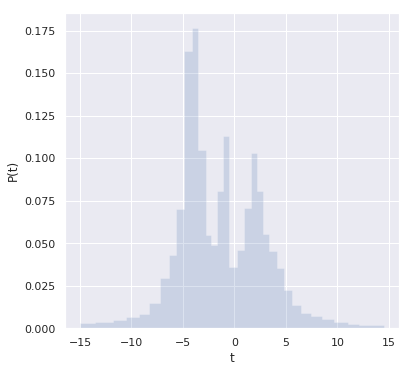

In [12]:
# using decision tree bin transfomer from dsbasics
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

# bbt = dsbasics.bin.DecisionTreeBinTransformer(max_leaf_nodes=None, max_depth=5, min_samples_leaf=5)

# uses 
#  sklearn.tree.DecisionTreeRegressor(max_leaf_nodes=self.max_leaf_nodes, random_state=0) # criterion='entropy',
# or
#  sklearn.tree.DecisionTreeRegressor(max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf, random_state=0) # criterion='entropy',


bbt1 = dsbasics.bin.DecisionTreeBinTransformer()
bin_edges = bbt1.fit(t.reshape(-1,1)).bins_[0]
ax1 = fig.add_subplot(121)
ax1.hist(t, bins=bin_edges, histtype='stepfilled', alpha=0.2, density=True)
ax1.set_xlabel('t')
ax1.set_ylabel('P(t)');